## Genetic Relationships: Identity by Descent
### The genetic (co)variance between individuals for a given phenotype is determined by common alleles for the QTL that explain variance for the phenotype

### In the absence of detailed information on the QTL, the (co)variance can be approximated by calculating the probability two individuals carry alleles that are identical by descent (IBD).
### - IBD represents the probability that the same allele is inherited by two individuals from some common ancestor.
### - These calculations can be done using pedigrees or genotypes

## A simple illustration
### In this exmple we are testing lines from 2 unrelated full sib families. The code below will simulate a polygenetic trait and compare prediction accuracy using a model that ignores genetic relationships and a mixed model that accounts for the relationships. ***you will need to download and install the package MASS***

## Loading Packages

In [1]:
#Loading libraries
req_packages<-c("MASS")

for(i in c(1:length(req_packages))){
  if (!require(req_packages[i], character.only = TRUE)){
   install.packages(req_packages[i])
  }
}

Loading required package: MASS



## Loading R function needed for the lab

In [2]:
source("https://raw.githubusercontent.com/Robbins-Lab/PLSCI-4170-7170/refs/heads/main/lab5/Simulate_and_Solve.R")

##Setting up parameters

In [3]:
#setting variety and residual variance
VarA=75
VarE=25
#mean of the families relative to the overall mean
meanFam=c(rep(-5,15),rep(5,15))
# setting seed for reproducible results
set.seed(35783948)

## Generating relationship matrix

[1] "A matrix"


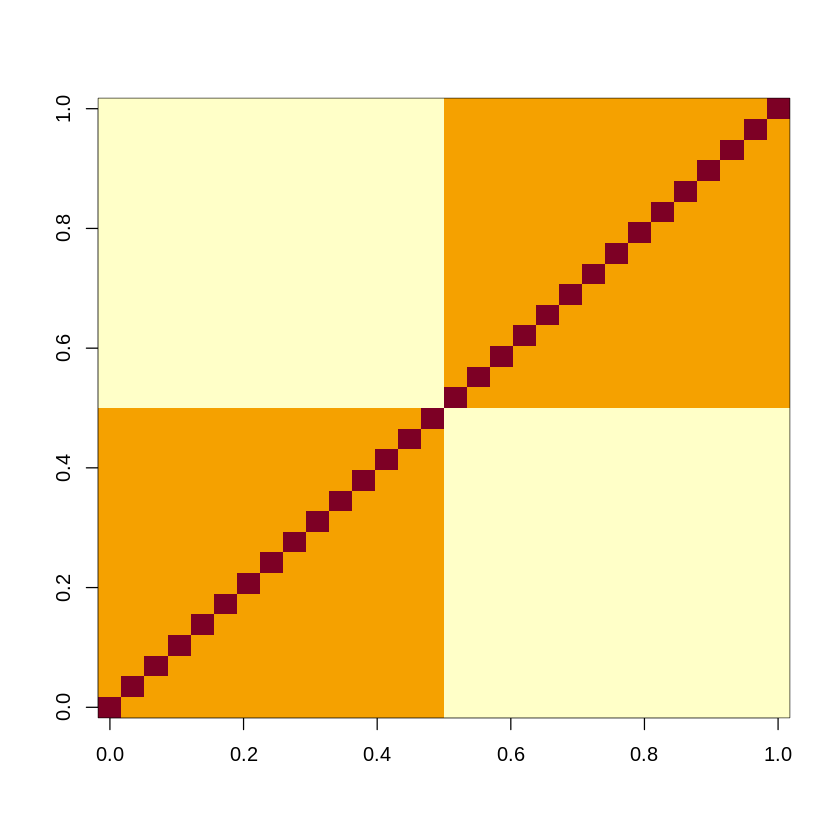

In [4]:
# this is the expected relationship matrix for to unrelated full-sib families
# there is a total of 30 lines, 15 lines in each family
#initializing a 30 x 30 matrix with all values = 0
A=matrix(0,30,30)
#creating a block of .5 for family 1
A[1:15,1:15]=.5
#creating a block of .5 for family 2
A[16:30,16:30]=.5
#setting the diagonal to 1
diag(A)<-1
print("A matrix")
image(A)

## Simulate Breeding Values

In [5]:
# sampling 30 variety effects
# now we are sampling from mvnorm since the variety effects are no longer iid
BV=MASS::mvrnorm(1,meanFam,VarA*A)

sol=simulate_and_solve(BV,A,VarA,VarE)
# LSM - Least squares means
# MM - BLUPs from the mixed model
sol

LSM,MM
94.07505,94.46937
87.36876,89.43965
89.43581,90.98993
89.18970,90.80535
98.45698,97.75581
108.74707,105.47338
105.10145,102.73916
96.46744,96.26366
95.12436,95.25635
96.96911,96.63991


## Questions
**1)** Conduct the following simulations using a difference in mean performance between the two families of 10.
  
A) (**1 pt**)  Use VarA = 75 and VarE = 25 (heritability = .75). Change the seeds and run the simulation 5 times
- Calculate the correlations between LSM and the true BV
- Calculate the correlations between LSM and the true BV
- Plot the BLUPs against LSM
  
B) (**1 pt**) Use VarA = 50 and VarE = 50 (heritability = .5). Change the seeds and run the simulation 5 times
- calculate the correlations between LSM and the true BV
- calculate the correlations between LSM and the true BV
- Plot the BLUPs against LSM
  
C) (**1 pt**) Use VarA = 25 and VarE = 75 (heritability = .25). Change the seeds and run the simulation 5 times
- Calculate the correlations between LSM and the true BV
- Calculate the correlations between LSM and the true BV
- Plot the BLUPs against LSM
      
D)(**1 pt**) What trends do you see in the plots of the BLUPS versus LSM? What would be causing this pattern?
   
E) (**1 pt**) How does heritability impact the relative performance BLUPs and LSM in terms of accuracy (correlations to the true BV)? Why?
   
**2)** Change the difference in mean performance between families to 5.

A) (**3 pts**) Repeat the simulations as outlined in  (1A-1C)
   
B) (**2 pts**) How did the change in the difference in mean performance between families impact the relative performance of BLUPs and LSM? Why?